In [1]:
import matplotlib.pyplot as plt
import os
import re
import json
import numpy as np
%matplotlib inline

### Calculate maximum LaTeX formula length from an input file

In [13]:
def max_length(file_path, encoding="utf-8"):
    lens = []
    with open(file_path, "r", encoding=encoding) as file:
        for line in file:
            lens.append(len(line))
    return lens, max(lens)

In [20]:
def plot_len_dist(file_path, *args, encoding="utf-8", **kwargs):
    lens, max_len = max_length(file_path, encoding)
    plt.hist(lens, **kwargs)
    print("File: {}, max_len: {}".format(file_path, max_len))

File: data/formulas_processed.lst, max_len: 2178


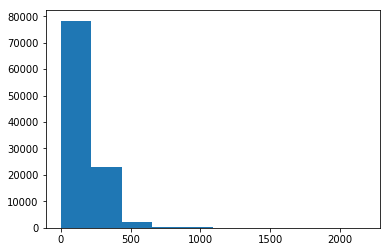

In [21]:
plot_len_dist("data/formulas_processed.lst")

File: data/formulas.lst, max_len: 998


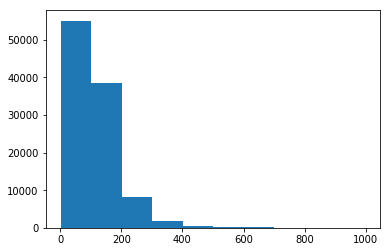

In [23]:
plot_len_dist("data/formulas.lst", encoding="ISO-8859-15")

### Encode-Decode

In [4]:
def to_utf(src_path, dest_path, encoding):
    with open(src_path, "r", encoding=encoding) as fin:
        with open(dest_path, "w", encoding="utf-8") as fout:
            for line in fin:
                fout.write(line)
    print("Done.")

In [27]:
to_utf("data/formulas.lst", "data/formulas_utf.lst", encoding="ISO-8859-15")

Done.


## Process/crawl `LaTeX` / `TeX`

In [125]:
regex = re.compile(r"\\(?:begin\{equation\*?\})\s?(?:\\(?:begin|label)\{(?:.*?)\}\s?)*\s*(.*?)\s*\\end\{(?:equation\*?|split)\}")
regex_2 = re.compile(r"(?:\$\s*(.*?)\s*\$|\$\$\s*(.*?)\s*\$\$)")

In [126]:
with open("data/test/test.tex", "r") as file:
    data_orig = file.read()
    data = data_orig.replace("\n", " ")

In [127]:
a = regex.findall(data)
b = regex_2.findall(data)

In [129]:
print("Count:", len(a))
for i in a[:20]:
    print(i)
    print()
print("=========================================")
b = list(map(lambda x: "".join(x), b))
print("Count:", len(b))
for i in b[:20]:
    print(i)


Count: 42
\hat{y}_i = \phi(\x_i) = \sum^K_{k=1} f_k(\x_i), \ \ f_k\in \mathcal{F},

\mathcal{L}(\phi) =& \sum_{i} l( \hat{y}_i, y_i ) + \sum_{k}\Omega( f_{k} ) \\  \mbox{ where }& \Omega(f) = \gamma T + \frac{1}{2} \lambda \|w\|^2

\mathcal{L}^{(t)} = \sum_{i=1}^n l(y_i,\hat{y_i}^{(t-1)}+f_t(\x_i))+\Omega(f_t)

\mathcal{L}^{(t)} \simeq \sum_{i=1}^n [l(y_i,\hat{y}^{(t-1)}) + g_i f_t(\x_i)+\frac{1}{2}h_i f_t^2(\x_i)] + \Omega(f_t)

\tilde{\mathcal{L}}^{(t)} = \sum_{i=1}^n [g_i f_t(\x_i)+\frac{1}{2}h_i f_t^2(\x_i)] + \Omega(f_t)

\tilde{\mathcal{L}}^{(t)}          &=\sum^n_{i=1} [g_i f_t(\x_i)+\frac{1}{2}h_if_t^2(\x_i)]+\gamma T + \frac{1}{2}\lambda\sum^T_{j=1}w_j^2\\          &=\sum^T_{j=1}[(\sum_{i\in I_j} g_i)w_j+\frac{1}{2}(\sum_{i\in I_j} h_i+\lambda)w_j^2]+\gamma T

w^*_j =-\frac{\sum_{i\in I_j} g_i}{\sum_{i\in I_j} h_i+\lambda},

\tilde{\mathcal{L}}^{(t)}(q) = - \frac{1}{2} \sum^T_{j=1}\frac{(\sum_{i\in I_j} g_i)^2}{\sum_{i\in I_j} h_i + \lambda}+\gamma T.

\mathcal{L}_{split} =\fr

In [107]:
print(data_orig)

% This is "sig-alternate.tex" V2.1 April 2013
% This file should be compiled with V2.5 of "sig-alternate.cls" May 2012
%
% This example file demonstrates the use of the 'sig-alternate.cls'
% V2.5 LaTeX2e document class file. It is for those submitting
% articles to ACM Conference Proceedings WHO DO NOT WISH TO
% STRICTLY ADHERE TO THE SIGS (PUBS-BOARD-ENDORSED) STYLE.
% The 'sig-alternate.cls' file will produce a similar-looking,
% albeit, 'tighter' paper resulting in, invariably, fewer pages.
%
% ----------------------------------------------------------------------------------------------------------------
% This .tex file (and associated .cls V2.5) produces:
%       1) The Permission Statement
%       2) The Conference (location) Info information
%       3) The Copyright Line with ACM data
%       4) NO page numbers
%
% as against the acm_proc_article-sp.cls file which
% DOES NOT produce 1) thru' 3) above.
%
% Using 'sig-alternate.cls' you have control, however, from within
% the so

In [75]:
print(len(a), len(b))

42 33


## Process json

In [3]:
with open("data/checkpoints/20190709_0221/checkpoints/checkpoint_292050.json", "r") as j:
    data = json.load(j)
    print(data.keys())

dict_keys(['i', 'val_loss_history', 'val_loss_history_it', 'forward_backward_times', 'opt', 'train_loss_history', 'memory_usage'])


In [4]:
len(data["train_loss_history"])

292050

In [5]:
data["opt"]

{'max_epochs': 50,
 'checkpoint_every': 1000,
 'batch_size': 50,
 'memory_benchmark': 0,
 'init_from': '',
 'grad_clip': 5,
 'model_type': 'lstm',
 'lr_decay_every': 5,
 'print_every': 1,
 'wordvec_size': 64,
 'seq_length': 50,
 'input_json': 'data/tiny-shakespeare.json',
 'num_layers': 2,
 'input_h5': 'data/formulas_processed.h5',
 'reset_iterations': 1,
 'rnn_size': 128,
 'dropout': 0,
 'checkpoint_name': 'cv/checkpoint',
 'batchnorm': 0,
 'learning_rate': 0.002,
 'speed_benchmark': 0,
 'gpu_backend': 'cuda',
 'lr_decay_factor': 0.5,
 'gpu': 0}

In [98]:
a = [1]
a.extend(2)
a

TypeError: 'int' object is not iterable

In [100]:
def f(x, *args):
    print(args)

f(3)
f(3, 4)

()
(4,)


In [141]:
with open("data/test/out.txt", "r") as f:
    data = f.readlines()
count = 0
count_ = 0
for line in data:
    if r"\end{array}" in line:
        end = True
    else:
        end = False
    if r"\begin{array}" in line:
        begin = True
    else:
        begin = False
    if end != begin:
        count += 1
    elif end and begin:
        count_ += 1
print(count, count_)

1 629


In [150]:
with open("/media/jupyter/New Volume/dataset/latex-gen/1993.txt", "r") as f:
    data = f.readlines()
count = 0
count_ = 0
for line in data:
    if r"end" in line:
        end = True
    else:
        end = False
    if "begin" in line:
        begin = True
    else:
        begin = False
    if end != begin:
        print(line)
    elif end and begin:
        count_ += 1
print(count, count_)

F[x,y] = \int{\frac{d^2 \vec{\alpha}}{\pi^N}} \int{\frac{d^2 \vec{\beta}}{\pi^N}} \int{\frac{d^2 \vec{\beta}'}{\pi^N}} \; \rho_R(\vec{\beta}^*, \vec{\beta}') \; e^{-\mid \vec{\alpha} \mid^2 - \frac{\mid \vec{\beta} \mid^2}{2} - \frac{\mid \vec{\beta}'\mid^2}{2}} \] \begin{equation} \int^{\vec{\alpha}^*}_{\vec{\beta}} {D^2 \vec{\alpha}} \int^{\vec{\alpha}}_{\vec{\beta}'^*} {D^2 \vec{\gamma}} \; e^{S_I[x, \vec{\alpha}] + S^*_I[y,\vec{\gamma}]}

\gamma(t) = \frac{\hbar \theta(t)}{2M_o} \int^\infty_0{d \omega} \int^\infty_0{d \omega'} S(\omega, \omega') (\omega - \omega') (n(\omega) - n(\omega')) \] \begin{equation}  \cos(\omega - \omega')t

D(t) = -\frac{\hbar^2 \theta(t)}{2} \int^\infty_0{d \omega} \int^\infty_0{d \omega'}  S(\omega - \omega')(\omega - \omega')^2  \]  \begin{equation} (n(\omega) + n(\omega')) \cos(\omega - \omega')t.

S(\Phi ,\Phi ^*)=S_{gauge-fixed}(\Phi )+\mbox{   antifield--dependent terms}\ .

\dkt ' F(z') = \left(\dkt F(z'(z))\right) _{c'=0}+\ c'\mbox{--dependent te

In [158]:
with open("data/combined_processed.txt", "r") as f:
    data = f.readlines()
    print(len(data))
    np.random.shuffle(data)
    print(len(data))

765330
765330


In [159]:
with open("data/combined_processed_shuffled.txt", "w") as f:
    for line in data:
        f.write(line)

# Split `train`/`test`/`valid`

In [12]:
from sklearn.model_selection import train_test_split

test_size = 0.02
valid_size = 0.02

In [22]:
with open("data/combined_processed_shuffled.txt", "r") as f:
    data = f.readlines()
    train, val_and_test = train_test_split(data, 
                                           test_size=test_size + valid_size, 
                                           random_state=44, 
                                           shuffle=True)

In [28]:
l = len(val_and_test)
with open("data/combined_processed_val.txt", "w") as f:
    f.write("".join(val_and_test[:l//2]))
with open("data/combined_processed_test.txt", "w") as f:
    f.write("".join(val_and_test[l//2:]))
with open("data/combined_processed_train.txt", "w") as f:
    f.write("".join(train))

# MaskGAN

In [2]:
import collections

In [7]:
a = ['a', 'c', 'z', 'a']
b = collections.Counter(a)
b

Counter({'a': 2, 'c': 1, 'z': 1})

In [8]:
b.items()

dict_items([('a', 2), ('c', 1), ('z', 1)])

In [26]:
def f(x):
    for i in range(100):
        yield i

def g(x):
    return f(x)

a = g(10)

In [27]:
next(a)

0

In [29]:
with open("data/combined_processed_test.txt", "r") as f:
    a = f.read()

In [2]:
import cv2
import matplotlib.pyplot as plt
from vebits_api import vis_util

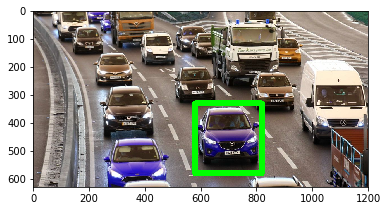

In [5]:
img = cv2.imread("/home/jupyter/Downloads/TMP_NEC_291117Traffic03JPG.jpg")
bbox = [580, 330, 820, 580]
plt.imshow(vis_util.draw_box_on_image(img, bbox, thickness=20))

In [10]:
def transparent(function):
    def overlay(*args, **kwargs):
        if len(args) > 0:
            img = args[0].copy()
        else:
            img = kwargs["img"].copy()
        if 
        kwargs = {k:v for k, v in kwargs.items() if k != "alpha"}
        img_drawn = function(*args, **kwargs)
        cv2.addWeighted(img_drawn, alpha, img, 1 - alpha,
                        0, img)
        return img
    return overlay

In [11]:
@transparent
def _draw_box_on_image(img, box, label, color,
                       text_scale=0.75, thickness=2):
    # Use default color if `color` is not specified.
    if color is None:
        color = COLORS[0]
    p1 = (int(box[0]), int(box[1]))
    p2 = (int(box[2]), int(box[3]))
    cv2.rectangle(img, p1, p2, color, thickness=thickness, lineType=1)
    if label is not None:
        cv2.putText(img, label, p1, FONT, fontScale=text_scale, color=color,
                    thickness=thickness, lineType=cv2.LINE_AA)
    return img

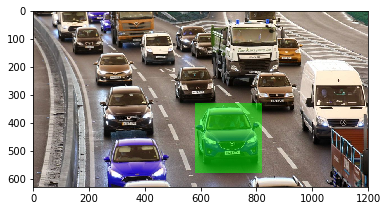

In [6]:
img = cv2.imread("/home/jupyter/Downloads/TMP_NEC_291117Traffic03JPG.jpg")
bbox = [580, 330, 820, 580]
plt.imshow(vis_util.draw_box_on_image(img, bbox, label=None, color=(0, 255, 0), thickness=-1, alpha=0.5))